# Подключение бибиотек

In [ ]:
# Устанавливаем пакет librosa для работы с аудио
!pip install librosa==0.8.0

     |████████████████████████████████| 183 kB 4.9 MB/s 
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201396 sha256=8f2b019321ac2d93b327ea645b915826ccca31c350d18584c9b5e440b18d1a1d
  Stored in directory: /root/.cache/pip/wheels/de/1e/aa/d91797ae7e1ce11853ee100bee9d1781ae9d750e7458c95afb
Successfully built librosa
  Attempting uninstall: librosa
    Found existing installation: librosa 0.8.1
    Uninstalling librosa-0.8.1:
      Successfully uninstalled librosa-0.8.1


In [ ]:
# Подключаем библиотеки
import sklearn
from IPython.display import Audio  # Воспроизведение аудиофайлов
import time                        # Для подсчёта времени 
import zipfile                     # Для разорхивации базы
import pandas as pd                # Для работы с табличными данными
from tensorflow.keras import utils # Для to_categorical
from google.colab import files     # Загрузка файлов
import os                          # Работа с папками и файлами
import librosa                     # Параметризация аудио
import librosa.feature             # Инструменты для параметризации
import numpy as np                 # Numpy массивы
import matplotlib.pyplot as plt    # Отображение графиков

# Отрисовка графиков в ячейках collab
%matplotlib inline 
from tensorflow.keras.optimizers import Adam, RMSprop # Оптимизатор для задания шага обучения
from keras.models import Sequential, Model # Два формата модели keras
from keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, MaxPooling1D, Reshape, Lambda # Базовые слови
from sklearn.model_selection import train_test_split # Разбиение на обучающую и проверочную выборку
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # Для нормировки данных
from keras.layers.advanced_activations import LeakyReLU # Импортируем функцию активации отдельным слоем
from keras import backend as K # Устанавливаем переменную для окружения кераса

In [ ]:
# Подключаем Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Подключение и параметризация данных

In [ ]:
!unzip -q '/content/drive/My Drive/музыкальная база/база пения птиц. 88 классов.zip'

In [ ]:
data = pd.read_csv('birdsong_metadata.csv')
bb = data.english_cname.unique() # заменить везде bb

In [ ]:
v=[] # лист ID
for l in os.listdir(f'/content/songs/songs/'):
  songname = f'{l}'
  list(songname)
  a = int(songname[2:-5]) 
  for i in range(len(data['file_id'].values)):
    if a==data['file_id'].values[i]:
      v.append(i) 

birds1=[] 
for j in v:
  birds1.append(data['english_cname'][j])

In [ ]:
def get_features(y, sr):
  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) 
  mfcc = librosa.feature.mfcc(y=y, sr=sr)             
  spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr) 
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)  
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)    
  zcr = librosa.feature.zero_crossing_rate(y)             
  return chroma_stft, mfcc, spec_cent, spec_bw, rolloff, zcr

# Создание выборки

In [ ]:
test=[]
for filename in os.listdir(f'/content/songs/songs/'):
  songname = f'/content/songs/songs/{filename}' 
  test.append(songname)

In [ ]:
name_bird=[]
count_frame=[]
frame=[]
frame_2=[]
frame_3=[]
frame_4=[]
frame_5=[]
frame_6=[]
test_control={}

for i in range(0,len(test[:264])): 
  bird_param=[]
  bird_param_2=[]
  bird_param_3=[]
  bird_param_4=[]
  bird_param_5=[]
  bird_param_6=[]
  test_song_name = test[i]
  test_song_nume = int(test_song_name[23:-5])
  for k in range(len(data['file_id'])):
    if test_song_nume == data['file_id'][k]:
      w = data['english_cname'][k]
      for t in range(len(bb)):
        if w == bb[t]:
          y, sr = librosa.load(test_song_name, mono=True)
          for p in range(0, (int(len(y)//22050))-4, 4):
            chroma_stft, mfcc, spec_cent, spec_bw, rolloff, zcr = get_features(y[p*sr:(p+4)*sr], sr)  
            bird_param.append(chroma_stft)
            bird_param_2.append(mfcc)
            bird_param_3.append(spec_cent)
            bird_param_4.append(spec_bw)
            bird_param_5.append(rolloff)
            bird_param_6.append(zcr)

          len_frame = len(bird_param)  
          name_bird.append(w)
          count_frame.append(len_frame)
          frame.append(bird_param)
          frame_2.append(bird_param_2)  # Мел кепстральные коэффициенты
          frame_3.append(bird_param_3) # Спектральный центроид
          frame_4.append(bird_param_4) # Ширина полосы частот
          frame_5.append(bird_param_5) # Спектральный спад частоты
          frame_6.append(bird_param_6)  # Пересечения нуля

          test_control['class_name'] = name_bird
          test_control['class_param'] = count_frame
          test_control['frame'] = frame
          test_control['frame_2'] = frame_2
          test_control['frame_3'] = frame_3
          test_control['frame_4'] = frame_4
          test_control['frame_5'] = frame_5
          test_control['frame_6'] = frame_6

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [ ]:
df=pd.DataFrame(test_control)
df["shape_param"]="-"
df["need_copy"]="-"
df["need_copy_2"]="-"
df["need_copy_3"]="-"
df["need_copy_4"]="-"
df["need_copy_5"]="-"
df["need_copy_6"]="-"

for w in df['class_name']:
  a=df.loc[df['class_name'] == w]
  shape_id=a.index[0]
  shape_len = sum(a['class_param'])
  df['shape_param'][shape_id] = shape_len

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def transform(new_columns,old_columns):
  anlocal_df = df.loc[df['shape_param'] == '-']
  class_id=anlocal_df.index
  for id in class_id:
    df[new_columns][id] = df[old_columns][id]

  local_df=df.loc[df['shape_param'] != '-']
  max_volume=max(local_df['shape_param']) 
  local_id=local_df.index
  for j in local_id: 
    number_frame = int(max_volume - local_df['shape_param'][j])
    if number_frame == 0: 
      df[new_columns][j] = df[old_columns][j].copy()
    else:
      new_number_frame = number_frame + local_df['class_param'][j]
      new_frame = []
      old_frame = df[old_columns][j].copy()
      while len(new_frame) != new_number_frame:
        for i in range(len(old_frame)):
          add_frame=old_frame[i]    
          new_frame.append(add_frame)
          if len(new_frame) == new_number_frame:
            break  
      df[new_columns][j]=new_frame

In [ ]:
def train_data(new_columns):
  dataset= []
  Y_train=[]
  for w in df['class_name']:
    for t in range(len(bb)):
      if w == bb[t]:
        a=df.loc[df['class_name'] == w]
        id_train = a.index
        for i in id_train:
          for j in range(len(a['need_copy'][i])):
            dataset.append(a[new_columns][i][j])
            Y_train.append(utils.to_categorical(t, len(bb)))
  set_train = np.array(dataset) 
  Y_train = np.array(Y_train)
  return set_train,Y_train

In [ ]:
old_columns = ['frame','frame_2','frame_3','frame_4','frame_5','frame_6']
new_columns = ['need_copy','need_copy_2','need_copy_3','need_copy_4','need_copy_5','need_copy_6']
for name_column in range(len(new_columns)): 
  transform(new_columns[name_column],old_columns[name_column])

In [ ]:
X_train_1, Y_train = train_data(new_columns[0])
X_train_2, __ = train_data(new_columns[1])
X_train_3, __ = train_data(new_columns[2])
X_train_4, __ = train_data(new_columns[3])
X_train_5, __ = train_data(new_columns[4])
X_train_6, __ = train_data(new_columns[5])
y_train_class = np.argmax(Y_train, axis=1) 

In [ ]:
mask = np.random.sample(X_train_1.shape[0])
train_mask = mask < 0.8  # обучающая
val_mask = (mask >= 0.8) & (mask < 0.999)  # проверочная
test_mask = (mask >= 0.999) # тестовая

In [ ]:
def scale(X):
  min_X = X.min()
  max_X = X.max()
  X = (X - min_X) / (max_X - min_X)
  return X

In [ ]:
X_train_1_scaled = scale(X_train_1)
X_train_2_scaled = scale(X_train_2)

# Создание модели

In [ ]:
input_1 = Input((12, 173))
input_2 = Input((20, 173))
x1 = BatchNormalization()(input_1)
x1 = Flatten()(x1)
x2 = BatchNormalization()(input_2)
x2 = Flatten()(x2)
x = concatenate([x1, x2])

x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(88, activation='softmax')(x)

model_simple = Model([input_1, input_2], x)
model_simple.compile(optimizer=Adam(lr=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model_simple.fit([X_train_1_scaled[train_mask], X_train_2_scaled[train_mask]], Y_train[train_mask],epochs=30, batch_size=50,
                    validation_data=([X_train_1_scaled[val_mask], X_train_2_scaled[val_mask]], Y_train[val_mask]))

Epoch 1/30
789/789 [==============================] - 10s 11ms/step - loss: 1.3782 - accuracy: 0.7230 - val_loss: 0.4051 - val_accuracy: 0.9155
Epoch 2/30
789/789 [==============================] - 8s 11ms/step - loss: 0.4991 - accuracy: 0.8854 - val_loss: 0.2521 - val_accuracy: 0.9505
Epoch 3/30
789/789 [==============================] - 8s 10ms/step - loss: 0.3298 - accuracy: 0.9141 - val_loss: 0.1165 - val_accuracy: 0.9729
Epoch 4/30
789/789 [==============================] - 8s 10ms/step - loss: 0.2744 - accuracy: 0.9265 - val_loss: 0.0928 - val_accuracy: 0.9786
Epoch 5/30
789/789 [==============================] - 8s 10ms/step - loss: 0.2273 - accuracy: 0.9367 - val_loss: 0.0891 - val_accuracy: 0.9850
Epoch 6/30
789/789 [==============================] - 8s 10ms/step - loss: 0.1819 - accuracy: 0.9487 - val_loss: 0.0597 - val_accuracy: 0.9875
Epoch 7/30
789/789 [==============================] - 8s 10ms/step - loss: 0.1664 - accuracy: 0.9519 - val_loss: 0.0483 - val_accuracy: 0.989

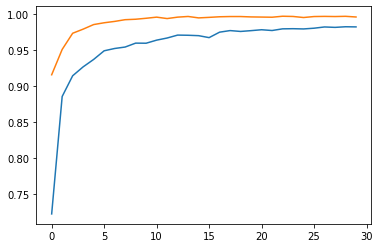

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

# Проверка НС

In [ ]:
y = model_simple.predict([X_train_1_scaled[test_mask],X_train_2_scaled[test_mask]])

In [ ]:
# результат работы НС после выравнивания выборки
print(np.argmax(y, axis=1))
print(np.argmax(Y_train[test_mask], axis=1))

[65 83 60 80 26 40 40 18 82 82 79 40  4  6  1 32  3 33 39 27 27 53  1  8
 47 73 55 76 13 26 55 44 51 62 11 84 53 57 27 21 21 27 45  8 38 38 64 60
  2 65 56 56 81 14 42]
[65 83 60 80 26 40 40 18 82 82 79 40  4  6  1 32  3 33 39 27 27 53  1  8
 47 73 55 76 13 26 55 44 51 62 11 84 53 57 27 21 21 27 45  8 38 38 64 60
  2 65 56 56 81 14 42]


In [ ]:
# результат работы НС до выравнивания выборки
print(np.argmax(y, axis=1))
print(np.argmax(Y_train[test_mask], axis=1))

[86 25 47  5 24 72 28]
[41 47 47  5 24 32 71]
